In [1]:
#Import Library Terlebih dahulu
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Membaca Dari Dataset
ngambil_data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

In [3]:
#Membuat kolom order month
ngambil_data['order_month'] = ngambil_data['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [4]:
#Membuat kolom gmv
ngambil_data['gmv'] = ngambil_data['item_price'] * ngambil_data['quantity']

(0.0, 41.05)

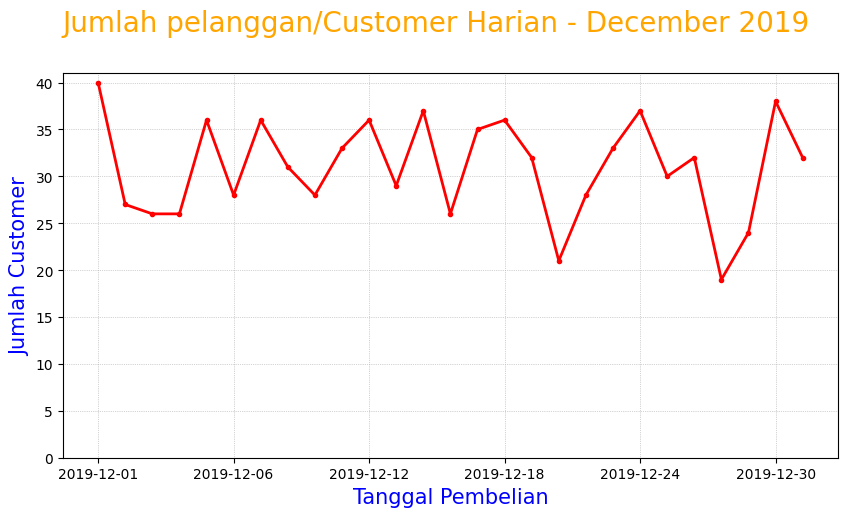

In [5]:
#Membuat plot grafik, sesuai intruksi di soal
plt.figure(figsize=(10, 5))
ngambil_data[ngambil_data['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Jumlah pelanggan/Customer Harian - December 2019', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Tanggal Pembelian', fontsize=15, color='blue')
plt.ylabel('Jumlah Customer', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

Case 1


---
Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.


In [6]:
#mengambil informasi top 5 brands berdasarkan quantity
merek_teratas = (ngambil_data[ngambil_data['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = ngambil_data[(ngambil_data['order_month']=='2019-12') & (ngambil_data['brand'].isin(merek_teratas['brand'].to_list()))]
# print top brands
print(merek_teratas)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


Case 2


---
Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain). Beri anotasi untuk titik lonjakan tersebut.



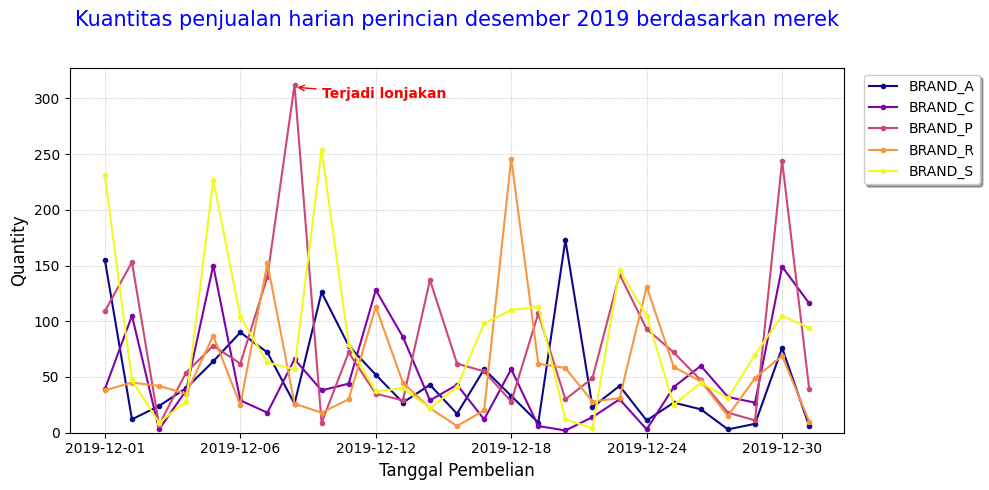

In [7]:
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Kuantitas penjualan harian perincian desember 2019 berdasarkan merek',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Tanggal Pembelian', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

Case 3


---
Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.



(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

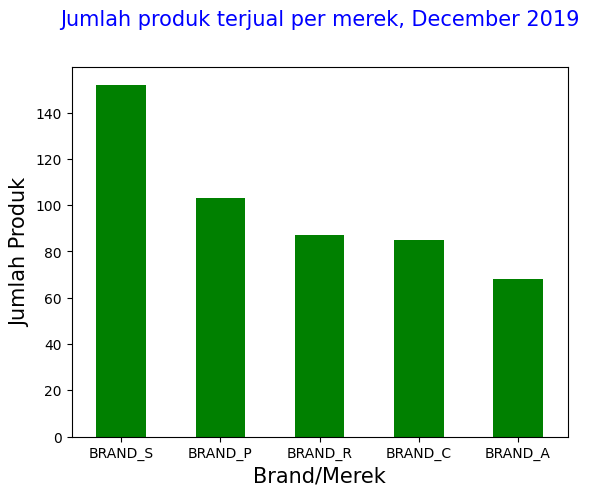

In [8]:
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Jumlah produk terjual per merek, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand/Merek', fontsize = 15)
plt.ylabel('Jumlah Produk',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

Case 4


---
Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019
Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di
bulan Desember 2019. Apakah ada pola yang menarik?


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

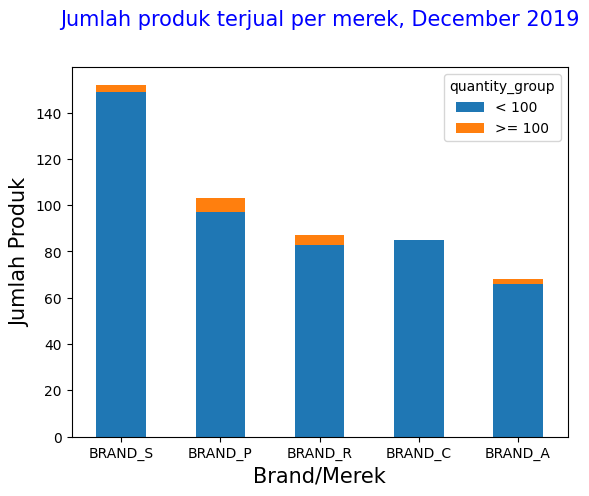

In [9]:
#Membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah produk terjual per merek, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand/Merek', fontsize = 15)
plt.ylabel('Jumlah Produk',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)


**Murah atau mahalkah harga produk brand top 5**
---


Case 5

---
Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut(untuk tiap
product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah
atau yang mahal?




(0.0, 2000000.0)

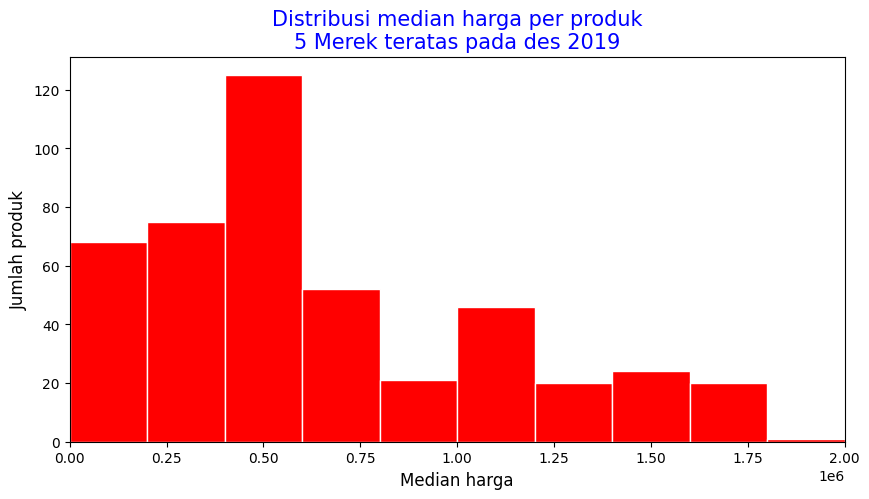

In [11]:
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='red', edgecolor='white')
plt.title('Distribusi median harga per produk\n5 Merek teratas pada des 2019',fontsize=15, color='blue')
plt.xlabel('Median harga', fontsize = 12)
plt.ylabel('Jumlah produk',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)

**Korelasi Quantity vs GMV**




Case 6a


---


Untuk setiap product_id, cek scatterplot antara quantity dan GMV, apakah ada korelasi? Bagaimana dengan
median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

([<matplotlib.axis.YTick at 0x7fa0d6ca54b0>,
 [Text(0, 0.0, '0'),
  Text(0, 25000000.0, '25'),
  Text(0, 50000000.0, '50'),
  Text(0, 75000000.0, '75'),
  Text(0, 100000000.0, '100'),
  Text(0, 125000000.0, '125'),
  Text(0, 150000000.0, '150'),
  Text(0, 175000000.0, '175'),
  Text(0, 200000000.0, '200')])

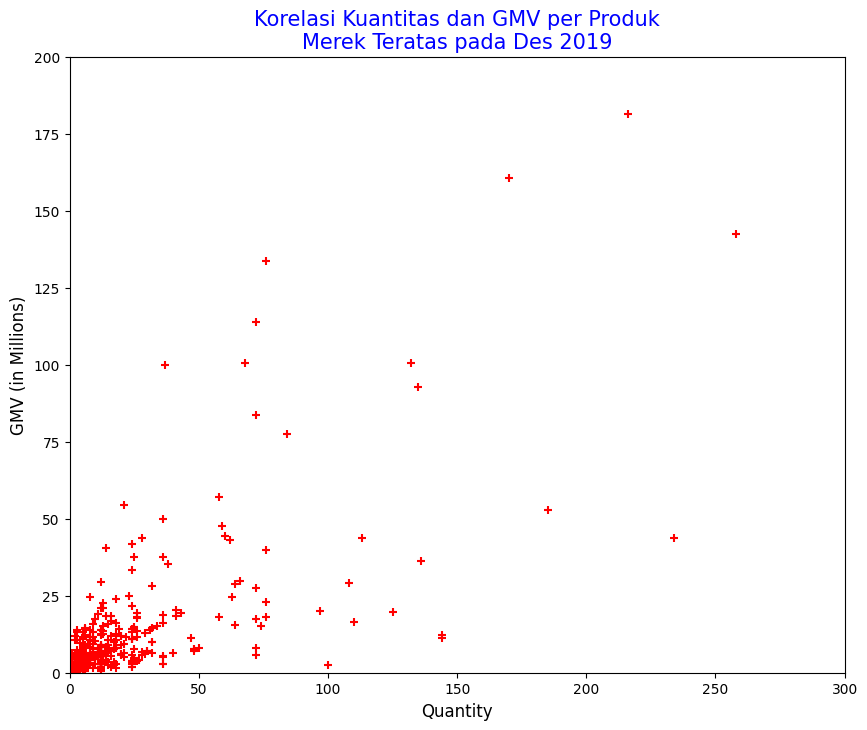

In [12]:
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Korelasi Kuantitas dan GMV per Produk\nMerek Teratas pada Des 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

**Korelasi median harga vs quantity**




Case 6b


---


Untuk setiap product_id, cek scatterplot antara quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case
6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih
banyak?

(0.0, 250.0)

<Figure size 640x480 with 0 Axes>

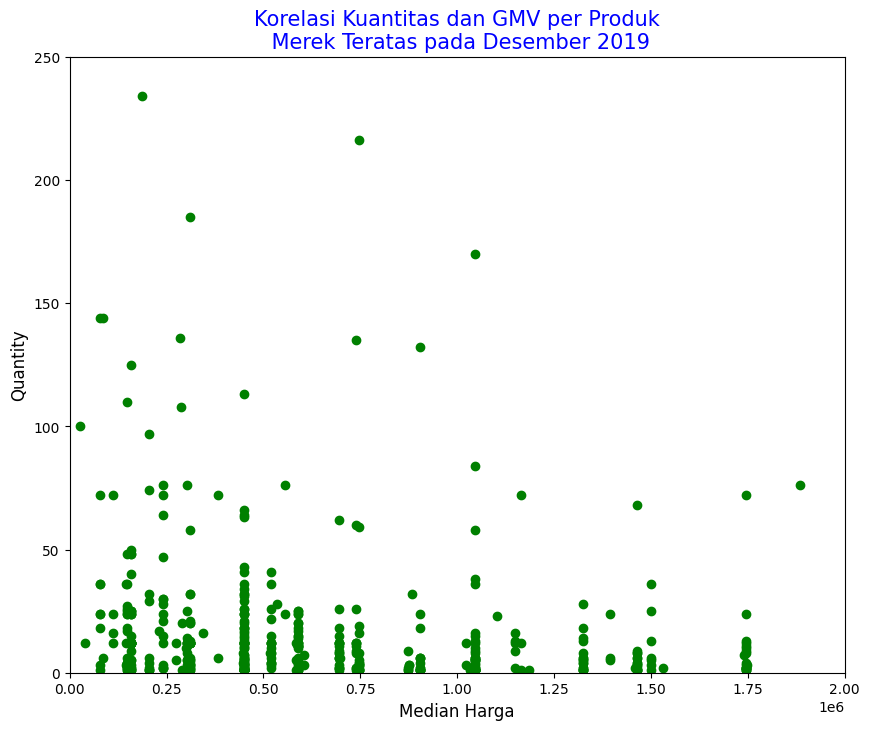

In [13]:
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Korelasi Kuantitas dan GMV per Produk\n Merek Teratas pada Desember 2019',fontsize=15, color='blue')
plt.xlabel('Median Harga', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)